In [3]:
import os

In [4]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
classes ={'Healthy':0, 'Virus':1}

In [6]:
X = [] #This stores the images
Y = [] #This stores the lable for each image

for clas in classes:
    pathh = '/kaggle/input/cotton/Data/Training/'+ clas
    for j in os.listdir(pathh):
        img = cv2.imread(pathh+'/'+j,0) #Read image in grayscale
        img = cv2.resize(img, (200,200)) #Resize each image
        X.append(img)
        Y.append(classes[clas])

In [7]:
np.unique(Y)

array([0, 1])

In [8]:
X = np.array(X)
Y = np.array(Y)

In [9]:
pd.Series(Y).value_counts()

0    127
1     90
dtype: int64

In [10]:
X.shape

(217, 200, 200)

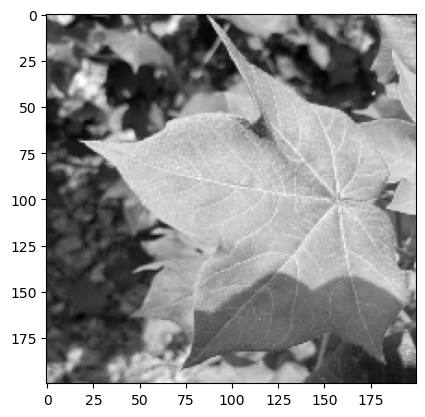

In [11]:
plt.imshow(X[0], cmap='gray')

In [12]:
#Flatten images
X_updated = X.reshape(len(X), -1)
X_updated.shape

(217, 40000)

**Split data**

In [13]:
# split data
x_train, x_test, y_train, y_test = train_test_split(X_updated, Y, 
                                                    random_state=10, test_size=0.2)

In [14]:
x_train.shape, x_test.shape

((173, 40000), (44, 40000))

### Feature scaling


In [15]:
print(x_train.max(),x_train.min())
print(x_test.max(),x_test.min())

x_train = x_train/255
x_test = x_test/255
print(x_train.max(),x_train.min())
print(x_test.max(),x_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


**Model**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [17]:
lg = LogisticRegression(C=0.1)
lg.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [18]:
sv = SVC()
sv.fit(x_train, y_train)

SVC()

### Evaluation

In [19]:
print('Training score', lg.score(x_train, y_train))
print('Testing score', lg.score(x_test, y_test))

Training score 1.0
Testing score 0.7727272727272727


In [20]:
print('Training score SVM', sv.score(x_train, y_train))
print('Testing score SVM', sv.score(x_test, y_test))

Training score SVM 0.9884393063583815
Testing score SVM 0.9090909090909091


### Prediction

In [21]:
pred_svm = sv.predict(x_test)
np.where(y_test!= pred_svm)

(array([ 5,  9, 19, 29]),)

In [22]:
pred_lg = lg.predict(x_test)
np.where(y_test!= pred_lg)

(array([ 1,  3,  5,  9, 16, 17, 29, 32, 39, 40]),)

In [23]:
pred_svm[5]

0

In [24]:
y_test[5]

1

### Test

In [25]:
dec ={0:'Healthy', 1:'Virus'}

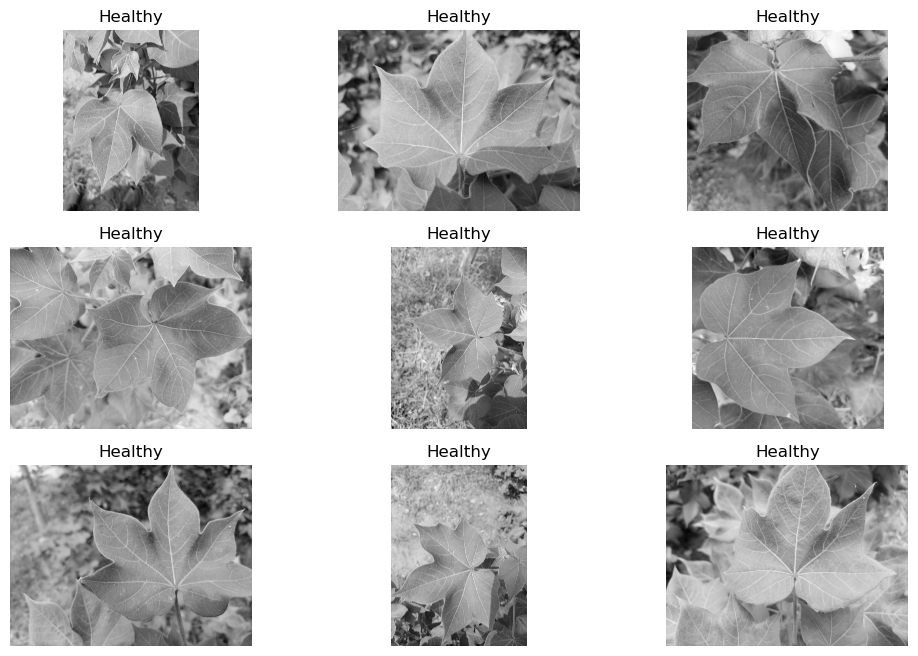

In [26]:
plt.figure(figsize=(12,8))
p = os.listdir('/kaggle/input/cotton/Data/Testing/')
c=1
for i in os.listdir('/kaggle/input/cotton/Data/Testing/Healthy')[:9]:
    plt.subplot(3,3,c)
    img = cv2.imread('/kaggle/input/cotton/Data/Testing/Healthy/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1, -1)/255
    pr = sv.predict(img1)
    plt.title(dec[pred_svm[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

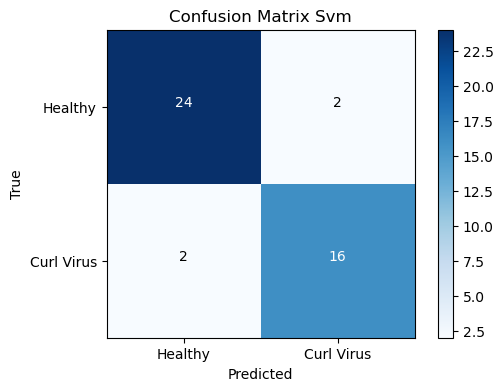

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

def plot_confusion_matrix_with_values(cm, classes):
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix Svm')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Add TP, FP, TN, FN values inside the plot
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
    
    plt.xticks(np.arange(len(classes)), classes)
    plt.yticks(np.arange(len(classes)), classes)
    plt.show()


# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_svm)

# Plot the confusion matrix with values inside
class_labels = ['Healthy', 'Curl Virus']
plot_confusion_matrix_with_values(cm, class_labels)

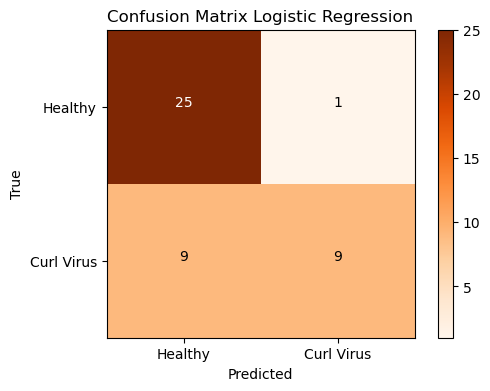

In [28]:
def plot_confusion_matrix_with_values(cm, classes):
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, cmap=plt.cm.Oranges)
    plt.title('Confusion Matrix Logistic Regression')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Add TP, FP, TN, FN values inside the plot
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
    
    plt.xticks(np.arange(len(classes)), classes)
    plt.yticks(np.arange(len(classes)), classes)
    plt.show()


# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_lg)

# Plot the confusion matrix with values inside
class_labels = ['Healthy', 'Curl Virus']
plot_confusion_matrix_with_values(cm, class_labels)

In [29]:
from sklearn.neighbors import KNeighborsClassifier


In [30]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
print('Training score SVM', KNN.score(x_train, y_train))
print('Testing score SVM', KNN.score(x_test, y_test))

Training score SVM 0.8670520231213873
Testing score SVM 0.8181818181818182


In [32]:
pred_knn = KNN.predict(x_test)
np.where(y_test!= pred_knn)

(array([ 1,  3, 16, 19, 21, 30, 36, 40]),)

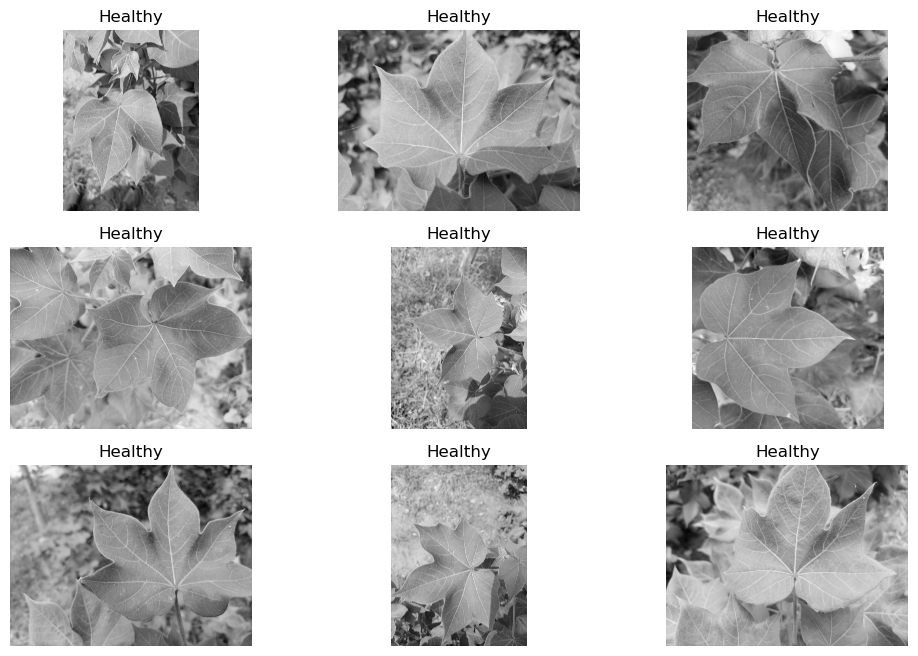

In [33]:
plt.figure(figsize=(12,8))
p = os.listdir('/kaggle/input/cotton/Data/Testing/')
c=1
for i in os.listdir('/kaggle/input/cotton/Data/Testing/Healthy')[:9]:
    plt.subplot(3,3,c)
    img = cv2.imread('/kaggle/input/cotton/Data/Testing/Healthy/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1, -1)/255
    pr = sv.predict(img1)
    plt.title(dec[pred_knn[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

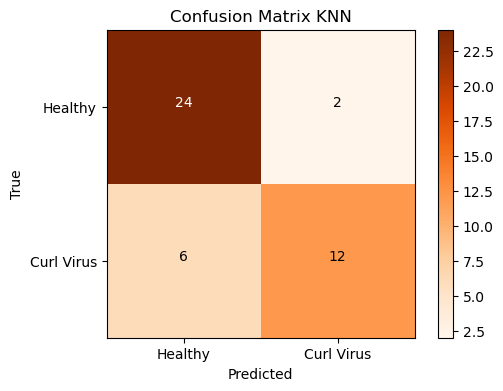

In [34]:
def plot_confusion_matrix_with_values(cm, classes):
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, cmap=plt.cm.Oranges)
    plt.title('Confusion Matrix KNN')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Add TP, FP, TN, FN values inside the plot
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
    
    plt.xticks(np.arange(len(classes)), classes)
    plt.yticks(np.arange(len(classes)), classes)
    plt.show()


# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_knn)

# Plot the confusion matrix with values inside
class_labels = ['Healthy', 'Curl Virus']
plot_confusion_matrix_with_values(cm, class_labels)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)


pred_clf = clf.predict(x_test)
accuracy = accuracy_score(y_test, pred_clf)


In [37]:
accuracy

0.8863636363636364

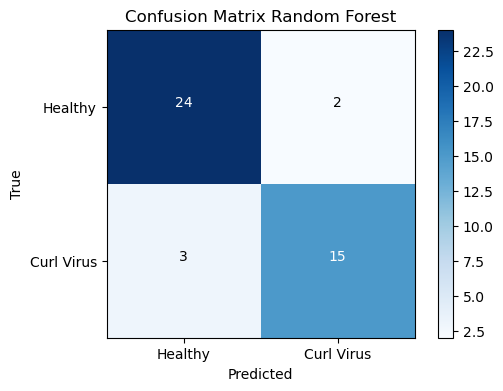

In [38]:
def plot_confusion_matrix_with_values(cm, classes):
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix Random Forest')
    plt.colorbar()
    plt.xlabel('Predicted')
    
    plt.ylabel('True')
    
    # Add TP, FP, TN, FN values inside the plot
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
    
    plt.xticks(np.arange(len(classes)), classes)
    plt.yticks(np.arange(len(classes)), classes)
    plt.show()


# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_clf)

# Plot the confusion matrix with values inside
class_labels = ['Healthy', 'Curl Virus']
plot_confusion_matrix_with_values(cm, class_labels)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtlf = DecisionTreeClassifier(random_state=42)
dtlf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
pred_dtlf = dtlf.predict(x_test)
accuracy = accuracy_score(y_test, pred_dtlf)

In [42]:
accuracy

0.7954545454545454

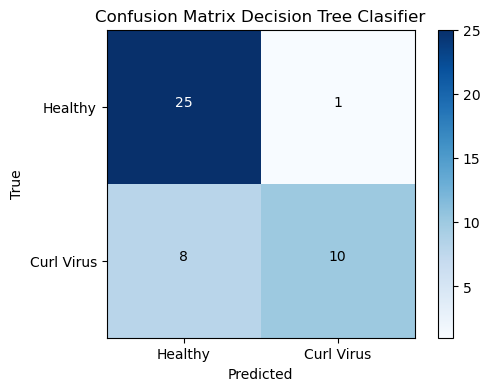

In [43]:
def plot_confusion_matrix_with_values(cm, classes):
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix Decision Tree Clasifier')
    plt.colorbar()
    plt.xlabel('Predicted')
    
    plt.ylabel('True')
    
    # Add TP, FP, TN, FN values inside the plot
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
    
    plt.xticks(np.arange(len(classes)), classes)
    plt.yticks(np.arange(len(classes)), classes)
    plt.show()


# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_dtlf)

# Plot the confusion matrix with values inside
class_labels = ['Healthy', 'Curl Virus']
plot_confusion_matrix_with_values(cm, class_labels)